# TUGAS BESAR MACHINE LEARNING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

# LOAD DATA

In [2]:
df = pd.read_csv('used_cars.csv')
df

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,0,7034441763,https://saltlakecity.craigslist.org/cto/d/salt...,salt lake city,https://saltlakecity.craigslist.org,17899,2012.0,volkswagen,golf r,excellent,...,4wd,compact,hatchback,black,https://images.craigslist.org/00G0G_fTLDWM5Xyv...,PRICE REDUCED! -Garage kept -Low Miles (63K)...,NaN,ut,40.7372,-111.858
1,1,7034440610,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,...,4wd,NaN,NaN,NaN,https://images.craigslist.org/00v0v_7Cu0buIofU...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
2,2,7034440588,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,46463,2015.0,gmc,sierra 1500,excellent,...,4wd,NaN,NaN,white,https://images.craigslist.org/01515_lPvJ9bfbdY...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
3,3,7034440546,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,...,4wd,NaN,NaN,NaN,https://images.craigslist.org/00T0T_6Rjfp3NS4O...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
4,4,7034406932,https://saltlakecity.craigslist.org/ctd/d/evan...,salt lake city,https://saltlakecity.craigslist.org,49999,2018.0,ford,f-450,NaN,...,4wd,NaN,pickup,white,https://images.craigslist.org/00W0W_8yIUwRBXXd...,2018 Ford F-350 F350 F 350 SD Lariat Crew Cab ...,NaN,ut,40.3744,-104.694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,19996,7049052853,https://kpr.craigslist.org/ctd/d/pasco-diesels...,kennewick-pasco-richland,https://kpr.craigslist.org,49999,2016.0,ram,cummin 2500 laramie,NaN,...,4wd,NaN,truck,grey,https://images.craigslist.org/00h0h_d5xQ6Q7Ygd...,Call or Text 509-412-3404 2016 Dodge Ram 2500...,NaN,wa,46.2348,-119.128
19997,19997,7049052797,https://kpr.craigslist.org/ctd/d/yakima-2018-n...,kennewick-pasco-richland,https://kpr.craigslist.org,12127,2018.0,nissan,sentra,NaN,...,fwd,NaN,sedan,NaN,https://images.craigslist.org/00Y0Y_cuQ8XIP5R4...,Bud Clary Toyota of YakimaÂ Â Â Â Â Â Â Â STOC...,NaN,wa,46.5642,-120.496
19998,19998,7049049369,https://kpr.craigslist.org/ctd/d/walla-walla-2...,kennewick-pasco-richland,https://kpr.craigslist.org,0,2019.0,jeep,grand cherokee limited,NaN,...,4wd,NaN,SUV,NaN,https://images.craigslist.org/00h0h_gvXVsydGQd...,Chrysler Dodge Jeep Ram of Walla WallaÂ Â Â Â ...,NaN,wa,46.0783,-118.293
19999,19999,7049042761,https://kpr.craigslist.org/ctd/d/yakima-2017-t...,kennewick-pasco-richland,https://kpr.craigslist.org,14661,2017.0,toyota,corolla,NaN,...,fwd,NaN,sedan,NaN,https://images.craigslist.org/00P0P_94PZlFJECu...,Bud Clary Toyota of YakimaÂ Â Â Â Â Â Â Â STOC...,NaN,wa,46.5642,-120.496


In [3]:
df.head(1000)

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,0,7034441763,https://saltlakecity.craigslist.org/cto/d/salt...,salt lake city,https://saltlakecity.craigslist.org,17899,2012.0,volkswagen,golf r,excellent,...,4wd,compact,hatchback,black,https://images.craigslist.org/00G0G_fTLDWM5Xyv...,PRICE REDUCED! -Garage kept -Low Miles (63K)...,NaN,ut,40.7372,-111.8580
1,1,7034440610,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,...,4wd,NaN,NaN,NaN,https://images.craigslist.org/00v0v_7Cu0buIofU...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.8840
2,2,7034440588,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,46463,2015.0,gmc,sierra 1500,excellent,...,4wd,NaN,NaN,white,https://images.craigslist.org/01515_lPvJ9bfbdY...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.8840
3,3,7034440546,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,...,4wd,NaN,NaN,NaN,https://images.craigslist.org/00T0T_6Rjfp3NS4O...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.8840
4,4,7034406932,https://saltlakecity.craigslist.org/ctd/d/evan...,salt lake city,https://saltlakecity.craigslist.org,49999,2018.0,ford,f-450,NaN,...,4wd,NaN,pickup,white,https://images.craigslist.org/00W0W_8yIUwRBXXd...,2018 Ford F-350 F350 F 350 SD Lariat Crew Cab ...,NaN,ut,40.3744,-104.6940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,7048595693,https://vermont.craigslist.org/ctd/d/franklin-...,vermont,https://vermont.craigslist.org,13995,2011.0,audi,q5 3.2 quattro prestige,excellent,...,4wd,NaN,SUV,grey,https://images.craigslist.org/00r0r_711h53dqwf...,"2011 Audi Q5 3.2 Quattro Prestige AWD, Automat...",NaN,vt,43.4426,-71.6491
996,996,7048574377,https://vermont.craigslist.org/ctd/d/franklin-...,vermont,https://vermont.craigslist.org,2495,2006.0,ford,explorer eddie bauer 4x4,excellent,...,4wd,NaN,SUV,blue,https://images.craigslist.org/00l0l_bsIs1K6IhR...,2006 Ford Explorer Eddie Bauer 7-Passenger 4WD...,NaN,vt,43.4426,-71.6491
997,997,7048571973,https://vermont.craigslist.org/ctd/d/hampton-2...,vermont,https://vermont.craigslist.org,22990,2012.0,ford,f350 super duty,excellent,...,4wd,NaN,NaN,NaN,https://images.craigslist.org/00X0X_8qAa69dNGt...,2012 FORD F-350 SD SUPERCAB 4WD www.pbsautovil...,NaN,vt,42.9213,-70.8593
998,998,7048569409,https://vermont.craigslist.org/cto/d/shoreham-...,vermont,https://vermont.craigslist.org,1300,1995.0,chevrolet,camaro,NaN,...,rwd,NaN,NaN,red,https://images.craigslist.org/00q0q_cGZNV2cQ7b...,"Parts or fixer upper, Had it running last year...",NaN,vt,43.8862,-73.3054


# KORELASI

Pada tahap ini akan dihitung korelasi antar kolom/atribut pada data. Hal ini bertujuan untuk melihat atribut yang paling memiliki hubungan terhadap data target sehingga dapat dipertimbangkan atribut mana yang akan digunakan agar hasil pembelajaran lebih efektif serta akurasi lebih tinggi. Data target disini saya memutuskan untuk memilih'price'

In [4]:
korelasi = df.corr()
korelasi

,Unnamed: 0,id,price,year,odometer,county,lat,long
Unnamed: 0,1.000000,-0.006098,0.006610,0.036414,-0.061438,NaN,0.297960,-0.565121
id,-0.006098,1.000000,-0.015290,-0.042850,0.043957,NaN,-0.049489,0.085952
price,0.006610,-0.015290,1.000000,-0.004382,-0.001608,NaN,-0.004885,0.001940
year,0.036414,-0.042850,-0.004382,1.000000,-0.401415,NaN,0.134063,-0.111264
odometer,-0.061438,0.043957,-0.001608,-0.401415,1.000000,NaN,-0.135611,0.148283
county,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lat,0.297960,-0.049489,-0.004885,0.134063,-0.135611,NaN,1.000000,-0.674701
long,-0.565121,0.085952,0.001940,-0.111264,0.148283,NaN,-0.674701,1.000000


In [5]:
cor = korelasi['price']
cor.drop(['price'])

Unnamed: 0    0.006610
id           -0.015290
year         -0.004382
odometer     -0.001608
county             NaN
lat          -0.004885
long          0.001940
Name: price, dtype: float64

In [6]:
sorted(cor.drop(['price']), reverse=True)

[0.006610323561833675,
 nan,
 0.0019395422837187384,
 -0.0016075696319364354,
 -0.004382429450409192,
 -0.004884730455690954,
 -0.015290423228515813]

Berdasarkan hasil penghitungan korelasi data, didapatkan bahwa atribut yang memiliki korelasi paling tinggi terhadap price jika diurutkan secara descending adalah sebagai berikut:

1. Long
2. Odometer
3. Year
4. Lat

In [7]:
data = (df[["long" , "odometer", "year", "lat", "price"]])
data.head()

,long,odometer,year,lat,price
0,-111.858,63500.0,2012.0,40.7372,17899
1,-111.884,10.0,2016.0,40.5881,0
2,-111.884,7554.0,2015.0,40.5881,46463
3,-111.884,10.0,2016.0,40.5881,0
4,-104.694,70150.0,2018.0,40.3744,49999


Pada tahap ini akan dilihat apakah atribut yang terpilih memiliki missing value atau tidak. Kolom dengan missing value dapat diisi dengan nilai median dari atribut tersebut.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20001 entries, 0 to 20000
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   long      18970 non-null  float64
 1   odometer  17612 non-null  float64
 2   year      19989 non-null  float64
 3   lat       18970 non-null  float64
 4   price     20001 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 781.4 KB


In [9]:
data = data.fillna({'long':data['long'].median()})
data.head(11)

,long,odometer,year,lat,price
0,-111.858,63500.0,2012.0,40.7372,17899
1,-111.884,10.0,2016.0,40.5881,0
2,-111.884,7554.0,2015.0,40.5881,46463
3,-111.884,10.0,2016.0,40.5881,0
4,-104.694,70150.0,2018.0,40.3744,49999
5,-104.694,120057.0,2009.0,40.3744,13999
6,-104.694,95484.0,2017.0,40.3744,34500
7,-104.694,89340.0,2007.0,40.3744,14500
8,-104.694,226031.0,2013.0,40.3744,12500
9,-104.694,128153.0,2012.0,40.3744,34500


In [10]:
data = data.fillna({'odometer':data['odometer'].median()})
data.head(11)

,long,odometer,year,lat,price
0,-111.858,63500.0,2012.0,40.7372,17899
1,-111.884,10.0,2016.0,40.5881,0
2,-111.884,7554.0,2015.0,40.5881,46463
3,-111.884,10.0,2016.0,40.5881,0
4,-104.694,70150.0,2018.0,40.3744,49999
5,-104.694,120057.0,2009.0,40.3744,13999
6,-104.694,95484.0,2017.0,40.3744,34500
7,-104.694,89340.0,2007.0,40.3744,14500
8,-104.694,226031.0,2013.0,40.3744,12500
9,-104.694,128153.0,2012.0,40.3744,34500


In [11]:
data = data.fillna({'year':data['year'].median()})
data.head(11)

,long,odometer,year,lat,price
0,-111.858,63500.0,2012.0,40.7372,17899
1,-111.884,10.0,2016.0,40.5881,0
2,-111.884,7554.0,2015.0,40.5881,46463
3,-111.884,10.0,2016.0,40.5881,0
4,-104.694,70150.0,2018.0,40.3744,49999
5,-104.694,120057.0,2009.0,40.3744,13999
6,-104.694,95484.0,2017.0,40.3744,34500
7,-104.694,89340.0,2007.0,40.3744,14500
8,-104.694,226031.0,2013.0,40.3744,12500
9,-104.694,128153.0,2012.0,40.3744,34500


In [12]:
data = data.fillna({'lat':data['lat'].median()})
data.head(11)

,long,odometer,year,lat,price
0,-111.858,63500.0,2012.0,40.7372,17899
1,-111.884,10.0,2016.0,40.5881,0
2,-111.884,7554.0,2015.0,40.5881,46463
3,-111.884,10.0,2016.0,40.5881,0
4,-104.694,70150.0,2018.0,40.3744,49999
5,-104.694,120057.0,2009.0,40.3744,13999
6,-104.694,95484.0,2017.0,40.3744,34500
7,-104.694,89340.0,2007.0,40.3744,14500
8,-104.694,226031.0,2013.0,40.3744,12500
9,-104.694,128153.0,2012.0,40.3744,34500


Setelah dilakukan penanganan missing value, dapat dilihat bahwa sudah tidak ada lagi missing value pada atribut-atribut yang dipilih.

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20001 entries, 0 to 20000
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   long      20001 non-null  float64
 1   odometer  20001 non-null  float64
 2   year      20001 non-null  float64
 3   lat       20001 non-null  float64
 4   price     20001 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 781.4 KB


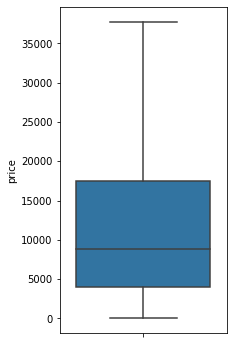

In [14]:
import seaborn as sns
plt.figure(figsize=(3,6))
sns.boxplot(y='price', data=df,showfliers=False);

count    2.000100e+04
mean     7.664058e+04
std      8.335762e+06
min      0.000000e+00
25%      3.970000e+03
50%      8.795000e+03
75%      1.749500e+04
max      1.172420e+09
Name: price, dtype: float64

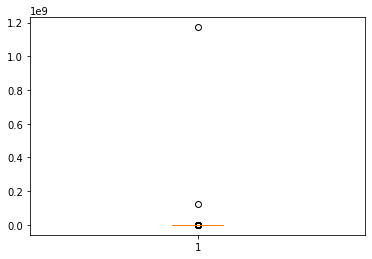

In [15]:
plt.boxplot(df['price'])
df['price'].describe()


# NORMALISASI DATA

Normalisasi data dilakukan untuk penskalaan nilai atribut dari data sehingga nilai data berada pada range tertentu. Teknik normalisasi yang dilakukan adalah Minmax. Minmax merupakan metode normalisasi dengan melakukan transformasi linier terhadap data asli.

In [16]:
def normalisasi(X_train_, X_test_):
  scaler = MinMaxScaler()
  X_train_minmax = scaler.fit_transform(X_train_)
  X_train_ = pd.DataFrame(X_train_minmax, columns=X_train_.columns)
  X_test_minmax = scaler.transform(X_test_)
  X_test_ = pd.DataFrame(X_test_minmax, columns=X_test_.columns)
  return X_train_,X_test_

Gambaran persebaran data dari kolom long, odometer, year, dan lat terhadap price

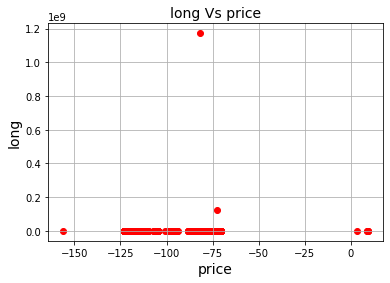

In [17]:
plt.scatter(data['long'], data['price'], color='red')
plt.title('long Vs price', fontsize=14)
plt.xlabel('price', fontsize=14)
plt.ylabel('long', fontsize=14)
plt.grid(True)
plt.show()

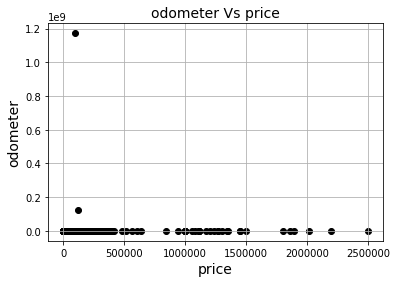

In [18]:
plt.scatter(data['odometer'], data['price'], color='black')
plt.title('odometer Vs price', fontsize=14)
plt.xlabel('price', fontsize=14)
plt.ylabel('odometer', fontsize=14)
plt.grid(True)
plt.show()

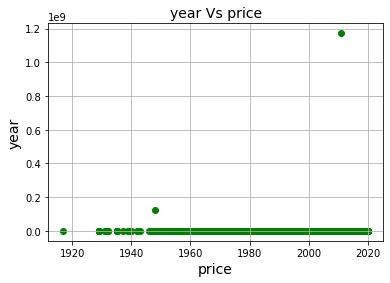

In [19]:
plt.scatter(data['year'], data['price'], color='green')
plt.title('year Vs price', fontsize=14)
plt.xlabel('price', fontsize=14)
plt.ylabel('year', fontsize=14)
plt.grid(True)
plt.show()

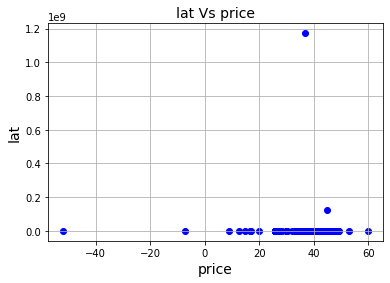

In [20]:
plt.scatter(data['lat'], data['price'], color='blue')
plt.title('lat Vs price', fontsize=14)
plt.xlabel('price', fontsize=14)
plt.ylabel('lat', fontsize=14)
plt.grid(True)
plt.show()

# Split Data

Inisialisasi atribut X dan Y.

X adalah fitur yang akan berpengaruh terhadap target. Y adalah data target.

In [58]:
X = data[['long', 'odometer', 'year', 'lat']]
Y = data['price']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=0)

In [60]:
X_train, X_test = normalisasi(X_train, X_test)

# Prediksi Harga

In [61]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
print(regressor.coef_)
print(regressor.intercept_)

[ -342851.75891575 -1142762.04796485  -874734.83445989 -2231086.23858976]
3141678.0192855606


In [63]:
y_pred = regressor.predict(X_test)

In [64]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
19135,1200,213445.844994
4981,7900,133742.736726
16644,15999,-3826.528561
16709,13999,21725.017789
5306,0,151926.961505
...,...,...
16554,4750,227255.508702
6025,29900,94858.785865
10340,1100,379101.787152
800,3500,111312.103649


In [76]:
#df.plot(kind='bar',figsize=(10,8))
#plt.grid(which='major', linestyle='-', linewidth='0.5', color='yellow')
#plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
#plt.show()

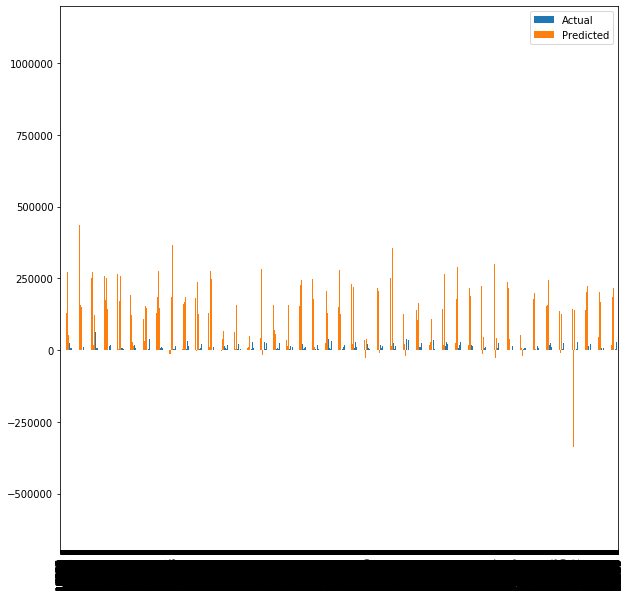

In [28]:
df.plot(kind='bar',figsize=(10,10))
plt.show()

# Penghitungan Error

Pada tahap ini dilakukan penghitungan error menggunakan Mean Absolute Error (MAE). Nilai MAE merepresentasikan rata – rata kesalahan (error) absolut antara hasil prediksi dengan nilai sebenarnya.

In [29]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 136953.9404994754
